In [1]:
%pip install requests
from io import BytesIO



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io

In [3]:
def kernel_matrix(kernelSize):
    k = kernelSize // 2
    x = np.zeros((kernelSize, kernelSize), dtype=float)
    y = np.zeros((kernelSize, kernelSize), dtype=float)
    for i in range(kernelSize): 
        for j in range(kernelSize):
            if i < k:
              x[i, j] = -1
            elif i > k:
              x[i, j] = 1
            

            if j < k:
              y[i, j] = -1
            elif j > k:
              y[i, j] = 1
    return x, y           
  
            

In [4]:
def compute_kernels(maxSize):
    kernels = {}
    for k in range(3, maxSize + 1, 2):  # Odd sizes only
        x_kernel, y_kernel = kernel_matrix(k)
        kernels[k] = (x_kernel, y_kernel)
    return kernels

In [5]:
def convolve(image, maxSize ,cutoffThreshold):

    #y
    h1 = np.zeros_like(image, dtype=float)  
    #x
    h2 = np.zeros_like(image, dtype=float)  
    #mag temp
    mag_temp = image.copy()  
    
    #mag
    mag = np.zeros_like(image, dtype=float)    
    
    #S
    S= np.zeros((image.shape[0], image.shape[1]), dtype=float)
   
    kernels = compute_kernels(maxSize)
    
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            max_mag=0
            for k in range(3, maxSize + 1, 2): 
                x_kernel, y_kernel = kernels[k]
                n=int(x_kernel.shape[0])
                paddingSize = n // 2
                
                # print(f"Processing pixel: ({i}, {j})")
                if(i>=paddingSize and j>=paddingSize and i<image.shape[0]-paddingSize and j<image.shape[1]-paddingSize):
                    
                    # Extract the region of interest (kernel-sized region)
                    region = image[i-paddingSize:i+paddingSize+1, j-paddingSize:j+paddingSize+1]  
                
            
                
                    h1[i,j] = np.sum(region * x_kernel) 
                    h2[i,j] = np.sum(region * y_kernel)
                    
                    
          
                    
            
                    
                    mag_temp[i,j]=np.sqrt((h1[i,j]**2 + h2[i,j]**2))/n**2
                    if mag_temp[i,j]>max_mag:
                        max_mag=mag_temp[i,j]
            
            if max_mag>cutoffThreshold:
                S[i,j]=n
                mag[i,j]=mag_temp[i,j]
                    
            else:
                S[i,j]=0
                mag[i,j]=0
    
   

    return  mag, S

In [6]:
def edge_detection(I, maxSize, cutoffThreshold):
    image_array = np.array(I)
    
    OutputMagnitude = np.zeros_like(image_array, dtype=float) # was added for final output of magnitude
    OutputKernel_map = np.zeros_like(image_array, dtype=float)  # was added for final output of final kernal

    OutputMagnitude, OutputKernel_map = convolve(image_array,maxSize, cutoffThreshold)
        
       
                    
    if(np.max(OutputMagnitude)>0):
        OutputMagnitude=(OutputMagnitude/np.max(OutputMagnitude)*255).astype(np.uint8)            
    
    print("OutputMagnitude: ", OutputMagnitude)        
    print("OutputKernel_map: ", OutputKernel_map)
    
    return OutputMagnitude, OutputKernel_map


/var/folders/_v/bvnn4hjs0h799wbkxyvnm5hm0000gn/T/ipykernel_85506/2959976101.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  mag_temp[i,j]=np.sqrt((h1[i,j]**2 + h2[i,j]**2))/n**2
/var/folders/_v/bvnn4hjs0h799wbkxyvnm5hm0000gn/T/ipykernel_85506/2959976101.py:51: RuntimeWarning: invalid value encountered in cast
  mag_temp[i,j]=np.sqrt((h1[i,j]**2 + h2[i,j]**2))/n**2


OutputMagnitude:  [[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]
OutputKernel_map:  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 ...
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


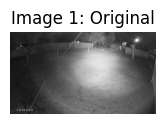

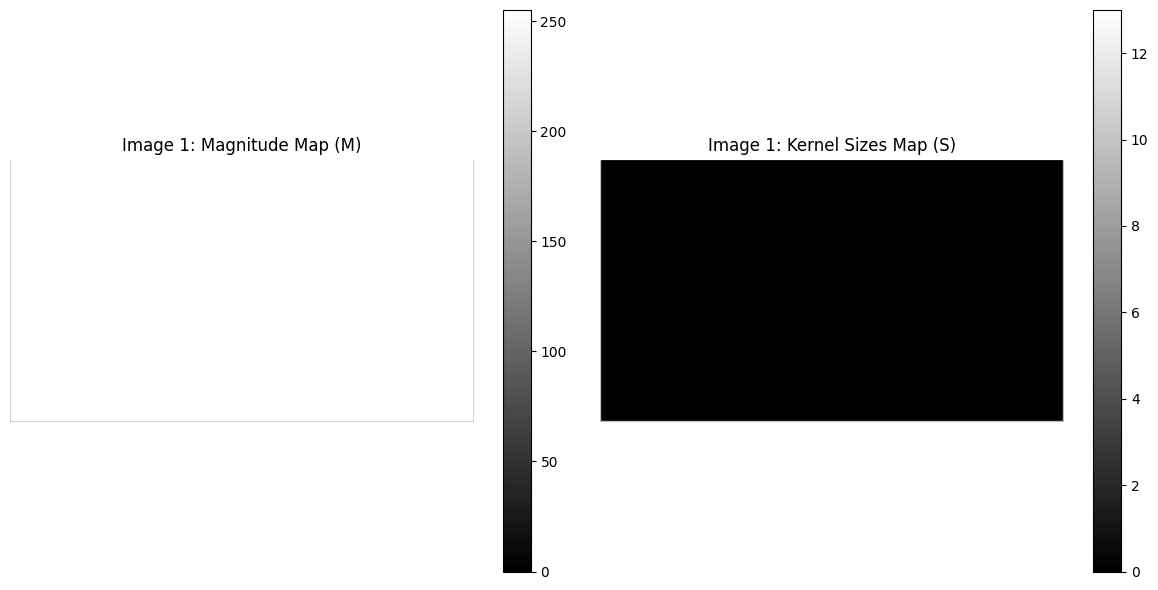

/var/folders/_v/bvnn4hjs0h799wbkxyvnm5hm0000gn/T/ipykernel_85506/2959976101.py:51: RuntimeWarning: invalid value encountered in scalar divide
  mag_temp[i,j]=np.sqrt((h1[i,j]**2 + h2[i,j]**2))/n**2


OutputMagnitude:  [[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]
OutputKernel_map:  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 ...
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


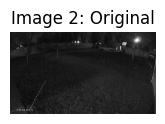

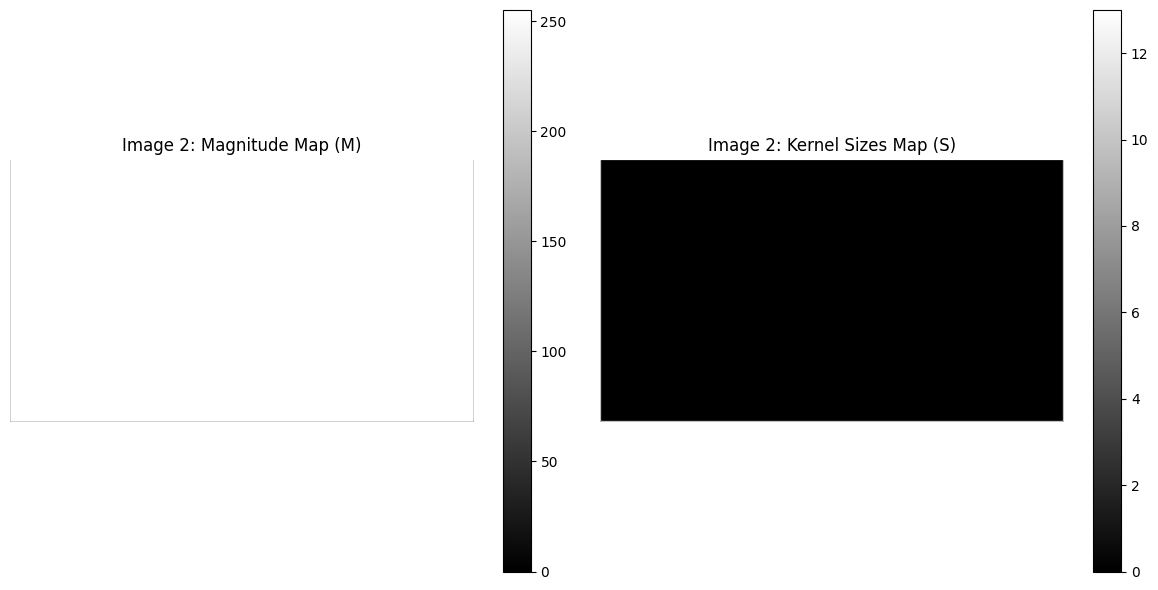

OutputMagnitude:  [[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]
OutputKernel_map:  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 ...
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


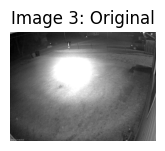

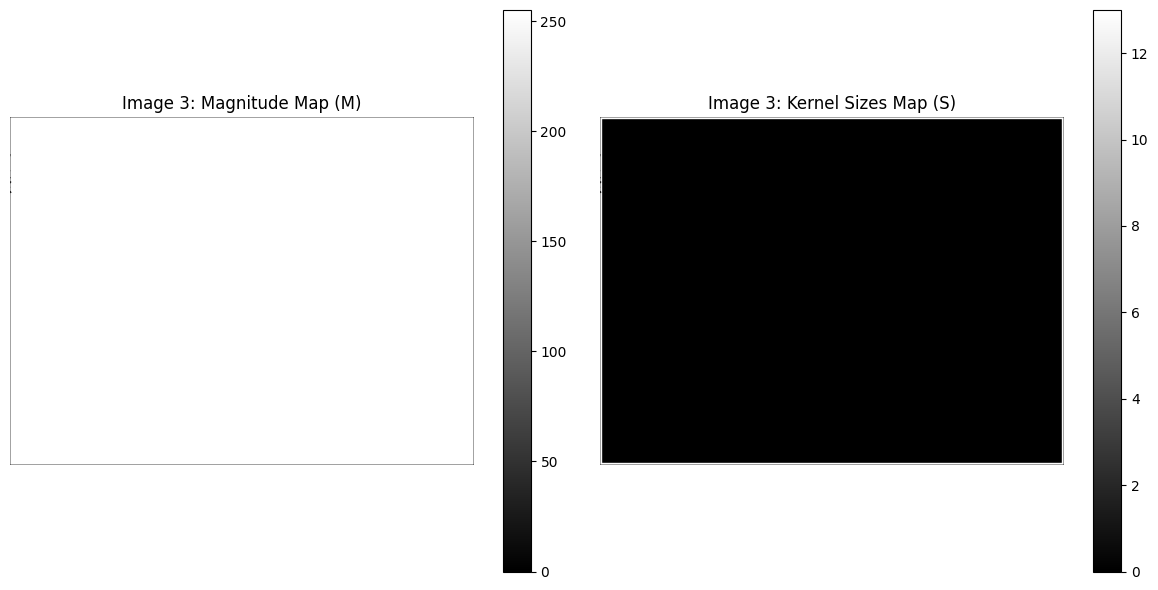

OutputMagnitude:  [[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]
OutputKernel_map:  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 ...
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0. 13. 13. ... 13. 13.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


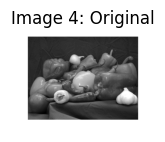

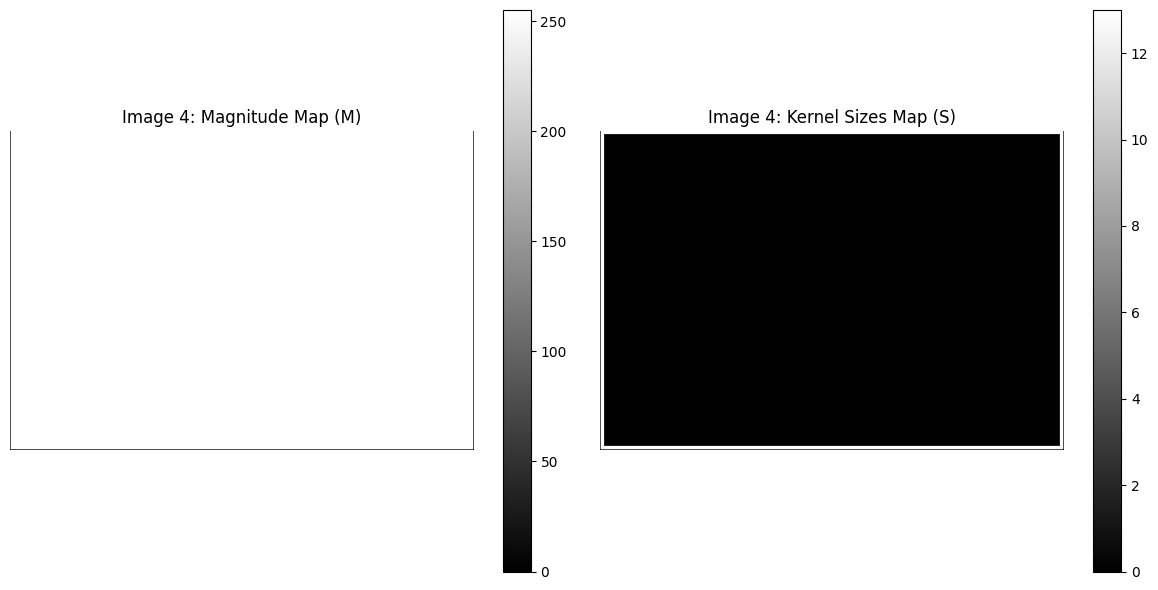

In [7]:

if __name__ == "__main__":
    # List of image URLs or file paths
    image_urls = [
        "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png",
        "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png",
        "https://networkcameratech.com/wp-content/uploads/2016/10/AXISP3364_2016-Oct-27_03_50_22.png",
        "https://www.mathworks.com/help/examples/matlab/win64/DisplayGrayscaleRGBIndexedOrBinaryImageExample_02.png"
    ]
    
    # Set parameters
    max_kernel_size = 13
    threshold = 10
    
    for idx, url in enumerate(image_urls):
        # Download the image
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
       
        # Compute maps
        magnitude_map, kernel_size_map = edge_detection(img, max_kernel_size, threshold)
        
        # Show the original image
        plt.subplot(1, 3, 1)
        plt.title(f"Image {idx + 1}: Original")
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        
        # Plot results
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"Image {idx + 1}: Magnitude Map (M)")
        plt.imshow(magnitude_map, cmap='gray')
        plt.colorbar()
        plt.axis('off')

        
        plt.subplot(1, 2, 2)
        plt.title(f"Image {idx + 1}: Kernel Sizes Map (S)")
        plt.imshow(kernel_size_map, cmap='gray')
        plt.colorbar()
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    